In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import time
import os
import ldspec
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm


# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp'
FIG_PATH = '/n/groups/price/martin/LDSPEC_data/results/fig_simu.rv1'
TAB_PATH = '/n/groups/price/martin/LDSPEC_data/results/tables.rv1'

# DF_TRAIT, DF_ANNOT, DF_PANNOT
DF_TRAIT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/trait_info.tsv', sep='\t')
DF_TRAIT.index = DF_TRAIT['Trait_Identifier']
TRAIT_LIST = list(DF_TRAIT.index)
TRAIT_LIST_INDPT = list(DF_TRAIT.index[DF_TRAIT['Indpt']])
print("n_trait=%d" % DF_TRAIT.shape[0])
print("n_trait_indpt=%d" % len(TRAIT_LIST_INDPT))

DF_ANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/annot_info.tsv', sep='\t')
DF_ANNOT.index = DF_ANNOT['Identifier']
print("n_annot=%d" % DF_ANNOT.shape[0])

DF_PANNOT = pd.read_csv('/n/groups/price/martin/LDSPEC_data/results/tables/pannot_info.tsv', sep='\t')
DF_PANNOT.index = DF_PANNOT['Identifier']
print("n_pannot=%d" % DF_PANNOT.shape[0])

# Others
temp_df = pd.read_csv('../names.txt', sep='\t', header=None)
DIC_NAME = {x:y for x,y in zip(temp_df[0], temp_df[1])}
DIC_COLOR = {'common_common' : '#78ADD2', 'common' : '#78ADD2', 'common_lf' : '#80C680',
             'lf_lf' : '#FFB26E', 'lf' : '#FFB26E'}
MARKER_LIST=['o', 'v', '^', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '<', '>']

n_trait=70
n_trait_indpt=29
n_annot=45
n_pannot=34


In [3]:
# LDSPEC results
DATA_PATH_OLD = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/simulation.100123'
DATA_PATH = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/simulation.011425'
DIC_RES_PATH = {}

# # gene, fct, prox
# DIC_RES_PATH['null_h2g50_p1'] = {
#     'truth' : DATA_PATH + '/null_h2g50_p1/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/null_h2g50_p1.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['null_h2g50_p100'] = {
#     'truth' : DATA_PATH + '/null_h2g50_p100/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/null_h2g50_p100.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['causal_h2g50_p1'] = {
#     'truth' : DATA_PATH + '/causal_h2g50_p1/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/causal_h2g50_p1.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['causal_h2g50_p100'] = {
#     'truth' : DATA_PATH + '/causal_h2g50_p100/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/causal_h2g50_p100.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['causal_highld_h2g50_p20'] = {
#     'truth' : DATA_PATH + '/causal_highld_h2g50_p20/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/causal_highld_h2g50_p20.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['causal_mafdepend_h2g50_p20'] = {
#     'truth' : DATA_PATH + '/causal_mafdepend_h2g50_p20/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH + '/causal_mafdepend_h2g50_p20.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['null_h2g50_p20.rep287K'] = {
#     'truth' : DATA_PATH + '/null_h2g50_p20.rep287K/rep@',
#     'prox_gene_fct_all_ld_ss50K' : DATA_PATH + '/null_h2g50_p20.rep287K.prox_gene_fct_all_ld_ss50K/rep@',
#     'prox_gene_fct_all_ld_NB44K' : DATA_PATH + '/null_h2g50_p20.rep287K.prox_gene_fct_all_ld_NB44K/rep@',
# }

# DIC_RES_PATH['causal_h2g50_p20.rep287K'] = {
#     'truth' : DATA_PATH + '/causal_h2g50_p20.rep287K/rep@',
#     'prox_gene_fct_all_ld_ss50K' : DATA_PATH + '/causal_h2g50_p20.rep287K.prox_gene_fct_all_ld_ss50K/rep@',
#     'prox_gene_fct_all_ld_NB44K' : DATA_PATH + '/causal_h2g50_p20.rep287K.prox_gene_fct_all_ld_NB44K/rep@',
# }

DIC_RES_PATH['causal_simple_h2g50_p20'] = {
    'truth' : DATA_PATH + '/causal_simple_h2g50_p20/rep@',
    'md_prox_gene_fct_all_ld' : DATA_PATH + '/causal_simple_h2g50_p20.prox_gene_fct_all_ld/rep@',
}

# # old simulations and simu_causal_pannot
# DIC_RES_PATH['null_h2g50_p20'] = {
#     'truth' : DATA_PATH_OLD + '/null_h2g50_p20/rep@',
#     'simu_causal_pannot' : DATA_PATH_OLD + '/null_h2g50_p20.simu_causal_pannot/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH_OLD + '/null_h2g50_p20.prox_gene_fct_all_ld/rep@',
# }

# DIC_RES_PATH['causal_h2g50_p20'] = {
#     'truth' : DATA_PATH_OLD + '/causal_h2g50_p20/rep@',
#     'simu_causal_pannot' : DATA_PATH_OLD + '/causal_h2g50_p20.simu_causal_pannot/rep@',
#     'md_prox_gene_fct_all_ld' : DATA_PATH_OLD + '/causal_h2g50_p20.prox_gene_fct_all_ld/rep@',
# }

### Read results 

In [4]:
dic_res = {}
dic_n_rep = {}

for simu in DIC_RES_PATH:
    dic_n_rep[simu] = 0
    for i_rep in range(100):
        if os.path.exists(DIC_RES_PATH[simu]['truth'].replace('@','%d'%i_rep)+'.sumstats.gz'):
            dic_n_rep[simu] = i_rep + 1
        else:
            break           
        
    dic_res[simu] = {}
    for i_rep in range(dic_n_rep[simu]):
        dic_res[simu][i_rep] = {}
        for md in DIC_RES_PATH[simu]:
            dic_res[simu][i_rep][md] = {}
            if md == 'truth':
                for res in ['tau', 'omega']:
                    dic_res[simu][i_rep]['truth'][res] = pd.read_csv(
                        DIC_RES_PATH[simu]['truth'].replace('@','%d'%i_rep)+'.eff_%s.tsv' % res, 
                        sep='\t', index_col=0
                    )
            else:
                if os.path.exists(DIC_RES_PATH[simu][md].replace('@','%d'%i_rep)+'.tau.tsv') is False:
                    print('Missing: ', DIC_RES_PATH[simu][md].replace('@','%d'%i_rep)+'.tau.tsv')
                    continue
                for res in ['tau', 'omega']:                
                    dic_res[simu][i_rep][md][res] = pd.read_csv(
                        DIC_RES_PATH[simu][md].replace('@','%d'%i_rep)+'.%s.tsv' % res, sep='\t', index_col=0
                )
    
    # Print h2
    for md in DIC_RES_PATH[simu]:
        if md=='truth': 
            continue
        v_ = np.array([dic_res[simu][x][md]['tau'].loc['AN:all', 'h2'] for x in range(dic_n_rep[simu])])
        v_se = np.array([dic_res[simu][x][md]['tau'].loc['AN:all', 'h2_se'] for x in range(dic_n_rep[simu])])
        v_true = np.array([dic_res[simu][0]['truth']['tau'].loc['AN:all', 'h2'] for x in range(dic_n_rep[simu])])
        print('%-20s n_rep=%d \t %-20s h2=%0.3f, h2_true=%0.3f, avg_jnse=%0.3f, empi_se=%0.3f' %(
            simu, dic_n_rep[simu], md, np.mean(v_), np.mean(v_true), np.mean(v_se), np.std(v_)
        ))

causal_simple_h2g50_p20 n_rep=50 	 md_prox_gene_fct_all_ld h2=0.482, h2_true=0.484, avg_jnse=0.023, empi_se=0.015


In [5]:
# Supp. Table for null and causal simulations and all quantities
term_list = [
    ['tau', 'tau', 0], ['tau', 'h2', 0], ['tau', 'scv', 0], 
    ['tau', 'h2_enrich', 1], ['tau', 'scv_enrich', 1], ['tau', 'h2_shrink', 1], 
    ['omega', 'omega', 0], ['omega', 'cov', 0], ['omega', 'cor', 0], ['omega', 'ecov', 0], ['omega', 'ecor', 0],
]
col_list = [
    'annot', 'term', 'term_identifier', 'truth', 'jnse', 
    'empi.mean', 'empi.se', 'empi.p', 'empi.fwer', 'empi.sig_str',
    'meta.mean', 'meta.se', 'meta.p', 'meta.fwer', 'meta.sig_str'
]

DIC_SUMMARY = {}
for simu in DIC_RES_PATH:
    DIC_SUMMARY[simu] = {}
    for md in DIC_RES_PATH[simu]: 
        if md == 'truth':
            continue
        DIC_SUMMARY[simu][md] = None
        res_tau_list = [dic_res[simu][x][md]['tau'] for x in range(dic_n_rep[simu])]
        res_omega_list = [dic_res[simu][x][md]['omega'] for x in range(dic_n_rep[simu])]
        for res,term,null_val in term_list:
            temp_df = pd.DataFrame(index=dic_res[simu][0][md][res].index, columns=col_list, dtype=float)
            temp_df['annot'] = temp_df.index
            temp_df['term'] = DIC_NAME[term]
            temp_df['term_identifier'] = term
            for row in temp_df.index:
                # empi.mean & empi.se
                v_ = [dic_res[simu][x][md][res].loc[row, term] for x in range(dic_n_rep[simu])]
                temp_df.loc[row, 'empi.mean'] = np.mean(v_)
                temp_df.loc[row, 'empi.se'] = np.std(v_) / np.sqrt(dic_n_rep[simu])
                # jnse
                v_se_ = [dic_res[simu][x][md][res].loc[row, '%s_se'%term] for x in range(dic_n_rep[simu])]
                temp_df.loc[row, 'jnse'] = np.sqrt(np.mean(np.array(v_se_)**2)) / np.sqrt(dic_n_rep[simu])
                # truth
                if row in dic_res[simu][0]['truth'][res].index: 
                    v_ = [dic_res[simu][x]['truth'][res].loc[row, term] for x in range(dic_n_rep[simu])]
                    temp_df.loc[row, 'truth'] = np.mean(v_)
                if simu.startswith('null') & (term in ['tau', 'omega', 'cov', 'cor', 'ecor']):
                    temp_df.loc[temp_df['truth'].isna(), 'truth'] = null_val
                if simu.startswith('causal') & (term in ['tau', 'omega']):
                    temp_df.loc[temp_df['truth'].isna(), 'truth'] = null_val
                if simu.startswith('causal') & (term in ['ecor']) & row.startswith('pAN:proxy'):
                    temp_df.loc[row, 'truth'] = 0                         
                # meta-analysis                
                mean_,se_,p_ = ldspec.util.ldspec_meta(res_tau_list, res_omega_list, term, row)
                temp_df.loc[row, ['meta.mean', 'meta.se', 'meta.p']] = mean_,se_,p_
            
            # multiple testing: meta
            temp_df['meta.fwer'] = temp_df['meta.p'] * temp_df.shape[0]
            temp_df['meta.sig_str'] = ['*' if x<0.05 else '' for x in temp_df['meta.fwer']]  
            # multiple testing: empi
            temp_z = np.array((temp_df['empi.mean']-null_val) / temp_df['empi.se'])
            temp_df['empi.p'] = ldspec.util.zsc2pval(temp_z)
            temp_df['empi.fwer'] = temp_df['empi.p'] * temp_df.shape[0]
            print(simu, temp_df.shape[0])
            temp_df['empi.sig_str'] = ['*' if x<0.05 else '' for x in temp_df['empi.fwer']]

            if DIC_SUMMARY[simu][md] is None:
                DIC_SUMMARY[simu][md] = temp_df.copy()
            else:
                DIC_SUMMARY[simu][md] = pd.concat([DIC_SUMMARY[simu][md], temp_df], axis=0)

causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 165
causal_simple_h2g50_p20 136
causal_simple_h2g50_p20 136
causal_simple_h2g50_p20 136


/home/jz286/WES_analysis/LDSPEC/ldspec/util.py:365: RuntimeWarning: divide by zero encountered in true_divide
  vwts = 1.0 / variances
/home/jz286/WES_analysis/LDSPEC/ldspec/util.py:369: RuntimeWarning: invalid value encountered in float_scalars
  tau2 = np.maximum(0, (Q - df) / (vwts.sum() - vwts.dot(vwts) / vwts.sum()))


causal_simple_h2g50_p20 136
causal_simple_h2g50_p20 136


### Check results 

In [6]:
# simu = 'causal_h2g50_p20'
# md = 'simu_causal_pannot'
# dic_res[simu][0][md]['tau'].loc['AN:all', ['h2', 'scv']] 

### Supp. Fig. : rho & cor & ecor straified by MAF

In [10]:
term_list = [['omega', 'omega', 0], ['omega', 'cor', 0], ['omega', 'ecor', 0]]
dic_name = {
    'null_h2g50_p1' : 'null (SCV=0.5 p_causal=0.01)', 
    'null_h2g50_p20' : 'null (SCV=0.5 p_causal=0.2)', 
    'null_h2g50_p100' : 'null (SCV=0.5 p_causal=1.00)',
    'causal_h2g50_p1' : 'causal (SCV=0.5 p_causal=0.01)', 
    'causal_h2g50_p20' : 'causal (SCV=0.5 p_causal=0.20)', 
    'causal_h2g50_p100' : 'causal (SCV=0.5 p_causal=1.00)',
    'causal_highld_h2g50_p20' : 'causal-high-ld (SCV=0.5 p_causal=0.2)',
    'causal_mafdepend_h2g50_p20' : 'causal-maf-dependent (SCV=0.5 p_causal=0.2)',
    'null_h2g50_p20.rep287K' : 'null (SCV=0.5 p_causal=0.2, B287K)',
    'causal_h2g50_p20.rep287K' : 'causal (SCV=0.5 p_causal=0.2, B287K)',
    'causal_simple_h2g50_p20' : 'causal-simple (SCV=0.5 p_causal=0.2)',
    ('p0_p100', 'common') : 'common pos-LD',
    ('p0_p100', 'lf') : 'low-freq pos-LD',
    ('n100_p0', 'common') : 'common neg-LD',
    ('n100_p0', 'lf') : 'low-freq neg-LD',
}

simu_md_list = [
#     ['null_h2g50_p20', 'simu_causal_pannot'], 
#     ['causal_h2g50_p20', 'simu_causal_pannot'], 
#     ['null_h2g50_p1', 'md_prox_gene_fct_all_ld'], 
#     ['null_h2g50_p100', 'md_prox_gene_fct_all_ld'], 
#     ['causal_h2g50_p1', 'md_prox_gene_fct_all_ld'], 
#     ['causal_h2g50_p100', 'md_prox_gene_fct_all_ld'], 
#     ['causal_highld_h2g50_p20', 'md_prox_gene_fct_all_ld'], 
    # ['causal_mafdepend_h2g50_p20', 'md_prox_gene_fct_all_ld'], 
    # ['null_h2g50_p20.rep287K', 'prox_gene_fct_all_ld_ss50K'], 
    # ['null_h2g50_p20.rep287K', 'prox_gene_fct_all_ld_NB44K'], 
    # ['causal_h2g50_p20.rep287K', 'prox_gene_fct_all_ld_ss50K'], 
    # ['causal_h2g50_p20.rep287K', 'prox_gene_fct_all_ld_NB44K'], 
    ['causal_simple_h2g50_p20', 'md_prox_gene_fct_all_ld'], 
]

causal_simple_h2g50_p20 md_prox_gene_fct_all_ld 34


,term_identifier,truth,empi.mean,empi.se,empi.p,empi.fwer
pAN:proxy_0_100_ld_p0_p100_maf_common_block,omega,-4.146124e-07,-4.179163e-07,1.057731e-07,0.000078,0.010581


,term_identifier,truth,empi.mean,empi.se,empi.p,empi.fwer
pAN:proxy_0_100_ld_p0_p100_maf_common_block,cor,-0.470983,-0.382829,0.048655,3.598823e-15,4.894399e-13
pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.389137,0.065348,2.603150e-09,3.540284e-07
pAN:H3K27ac_PGC2_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.399690,0.083802,1.847414e-06,2.512483e-04
pAN:H3K4me1_Trynka_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.314338,0.079948,8.431853e-05,1.146732e-02
pAN:Intron_UCSC_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.405081,0.088221,4.397695e-06,5.980865e-04
pAN:SuperEnhancer_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.412916,0.091752,6.784599e-06,9.227054e-04
pAN:Transcribed_Hoffman_proxy_0_100_ld_p0_p100_maf_common_block,cor,NaN,-0.356224,0.086465,3.790596e-05,5.155211e-03


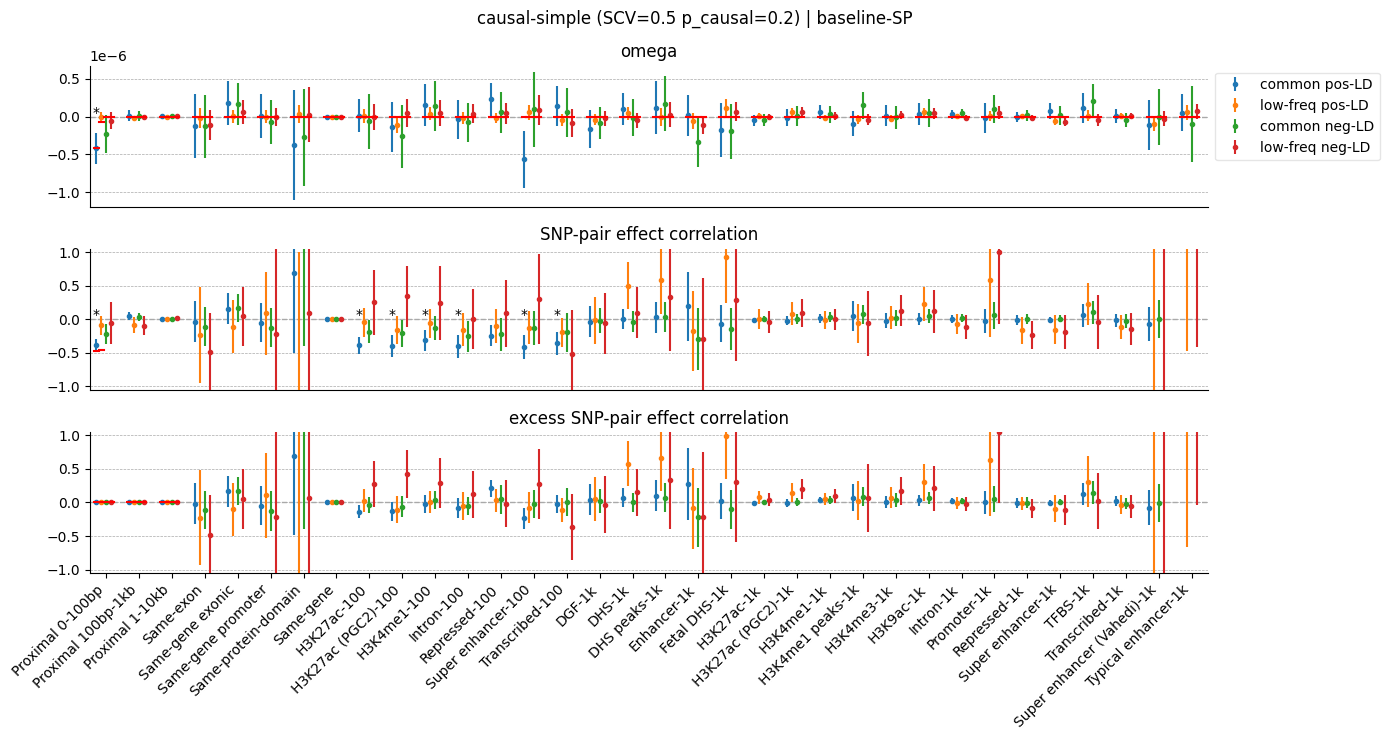

In [11]:
for simu,md in simu_md_list: 
#     plot_list = [x for x in DF_PANNOT.index if 'pAN:%s_ld_n100_p0_maf_lf_block'%x in DIC_SUMMARY[simu][md].index]
    plot_list = [x for x in DF_PANNOT.index if 'pAN:%s_ld_p0_p100_maf_lf_block'%x in DIC_SUMMARY[simu][md].index]
    print(simu, md, len(plot_list))
    if md=='simu_causal_pannot':
        plt.figure(figsize=[6, 7.5])
    else:
        plt.figure(figsize=[14, 7.5])
    for i_plot,temp in enumerate(term_list):
        res,term,null_val = temp
        ind_select = DIC_SUMMARY[simu][md]['term_identifier']==term
        df_plot = DIC_SUMMARY[simu][md].loc[ind_select].copy()
        ind_select = df_plot['empi.sig_str']=='*'
        if ind_select.sum()>0:
            display(df_plot.loc[
                ind_select, ['term_identifier', 'truth', 'empi.mean', 'empi.se', 'empi.p', 'empi.fwer']
            ])
        ax = plt.subplot(3,1,i_plot+1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        for i_bin,(lbin,mbin) in enumerate([
            ('p0_p100', 'common'), ('p0_p100', 'lf'), ('n100_p0', 'common'), ('n100_p0', 'lf'),
        ]):
            if (md=='simu_causal_pannot') and (lbin=='n100_p0'):
                continue
            row_list = ['pAN:%s_ld_%s_maf_%s_block'%(x,lbin,mbin) for x in plot_list]   
            plt.errorbar(
                np.arange(len(row_list))+0.15*i_bin-0.3, df_plot.loc[row_list, 'empi.mean'],
                yerr=df_plot.loc[row_list, 'empi.se']*1.96, fmt= '.', label=dic_name[(lbin,mbin)], zorder=10
            )
            for i_row,row in enumerate(row_list):
                plt.plot([i_row+0.15*i_bin-0.375, i_row+0.15*i_bin-0.225], 
                         [df_plot.loc[row, 'truth'], df_plot.loc[row, 'truth']], '-', color='r', zorder=15)
                plt.text(i_row+0.15*i_bin-0.3,
                         min(1.01, max(0, df_plot.loc[row, 'empi.mean'] + df_plot.loc[row, 'empi.se'] * 1.96)), 
                         df_plot.loc[row, 'empi.sig_str'], ha='center') 

        plt.plot([-0.5, len(plot_list)-0.5], [0, 0], '--', linewidth=1, zorder=0, color="darkgrey")
        plt.xlim([-0.5, len(plot_list)-0.5]) 
        if term in ['cor', 'ecor']:
            plt.ylim([-1.05, 1.05])
            plt.yticks([-1, -0.5, 0, 0.5, 1])
        plt.grid(axis='y', linewidth=0.5, linestyle='--', color='darkgrey', zorder=0)
            
        plt.title(DIC_NAME[term])
        if i_plot == 0:
            plt.legend(loc='upper left', framealpha=0.5, bbox_to_anchor=(1, 1))
        if i_plot <2:
            plt.xticks([], [])
        if i_plot == 2:
            plt.xticks(np.arange(len(plot_list)), [DIC_NAME[x] if x in DIC_NAME else x for x in plot_list], 
                       rotation=45, ha='right')          
    
    plt.suptitle('%s | %s' % (dic_name[simu], DIC_NAME[md] if md in DIC_NAME else md))
    plt.tight_layout()
    plt.savefig(FIG_PATH + '/other.%s.%s.pdf'%(simu,md))
    plt.show()

### Main figure using prox_gene_fct_all_ld_ss50K

In [9]:
simu = 'causal_h2g50_p20'
term = 'cor'

md = 'simu_causal_pannot'
ind_select = DIC_SUMMARY[simu][md]['term_identifier']==term
temp_df1 = DIC_SUMMARY[simu][md].loc[ind_select].copy()

md = 'md_prox_gene_fct_all_ld'
ind_select = DIC_SUMMARY[simu][md]['term_identifier']==term
temp_df2 = DIC_SUMMARY[simu][md].loc[ind_select].copy()

pAN_list = [
    'pAN:proxy_0_100_ld_p0_p100_maf_@_block', 'pAN:proxy_100_1000_ld_p0_p100_maf_@_block', 
    'pAN:SuperEnhancer_Hnisz_proxy_0_1000_ld_p0_p100_maf_@_block',
]
pAN_list = [x.replace('@', y) for x in pAN_list for y in ['common', 'lf']]

print(temp_df1.loc[pAN_list, 'empi.mean'] / temp_df1.loc[pAN_list, 'truth'])
print(temp_df2.loc[pAN_list, 'empi.mean'] / temp_df2.loc[pAN_list, 'truth'])

print(temp_df1.loc[pAN_list, 'empi.mean'])
print(temp_df2.loc[pAN_list, 'empi.mean'])

KeyError: 'causal_h2g50_p20'

In [ ]:
temp_df2.loc[pAN_list]

In [ ]:
DIC_RES_PATH['null_h2g50_p20.rep287K'] = {
    'truth' : DATA_PATH + '/null_h2g50_p20.rep287K/rep@',
    'prox_gene_fct_all_ld_ss50K' : DATA_PATH + '/null_h2g50_p20.rep287K.prox_gene_fct_all_ld_ss50K/rep@',
    'prox_gene_fct_all_ld_NB44K' : DATA_PATH + '/null_h2g50_p20.rep287K.prox_gene_fct_all_ld_NB44K/rep@',
}

DIC_RES_PATH['causal_h2g50_p20.rep287K'] = {
    'truth' : DATA_PATH + '/causal_h2g50_p20.rep287K/rep@',
    'prox_gene_fct_all_ld_ss50K' : DATA_PATH + '/causal_h2g50_p20.rep287K.prox_gene_fct_all_ld_ss50K/rep@',
    'prox_gene_fct_all_ld_NB44K' : DATA_PATH + '/causal_h2g50_p20.rep287K.prox_gene_fct_all_ld_NB44K/rep@',
}

# old simulations and simu_causal_pannot
DIC_RES_PATH['null_h2g50_p20'] = {
    'truth' : DATA_PATH_OLD + '/null_h2g50_p20/rep@',
    'simu_causal_pannot' : DATA_PATH_OLD + '/null_h2g50_p20.simu_causal_pannot/rep@',
}

DIC_RES_PATH['causal_h2g50_p20'] = {
    'truth' : DATA_PATH_OLD + '/causal_h2g50_p20/rep@',
    'simu_causal_pannot' : DATA_PATH_OLD + '/causal_h2g50_p20.simu_causal_pannot/rep@',
}